In [1]:
# 2 replicates needed to be removed
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from statsmodels.stats.weightstats import ttest_ind
import pickle
import re as re
%matplotlib inline
import math
from numpy import nan

In [2]:
ibs_datainfo = pd.read_excel(r'/Users/xiaoyuemei/Downloads/IBS_meta.xlsx', 'Sheet1')
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS ages.xlsx','Sheet1')


In [4]:
anor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/nor.pickle', "rb"))
arth = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/rheumatoid_arthritis.pickle', "rb"))
down = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/Down_syndrome.pkl', "rb"))
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/IBS ages.xlsx','Sheet1')
ms = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/MS.pickle', "rb"))
parknor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/norm_park.pickle', "rb"))
park = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/dis_park.pickle', "rb"))
werner = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/Werner_Syndrome.pickle', "rb")) 
hiv = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/GSEdata/HIV_male.pkl', "rb"))


In [5]:
down_nor = down.iloc[26:, :]
down_nor['dataset'] = 'down_nor'

down_dis = down.iloc[:26, :]
down_dis['dataset'] = 'down_dis'

anor = anor.rename(columns={'age':'Age'})
anor['dataset'] = 'anor'

arth = arth.rename(columns={'age':'Age'})
arth['dataset'] = 'arth'

park= park.rename(columns={'age':'Age'})
park['dataset'] = 'park'

parknor= parknor.rename(columns={'age':'Age'})
parknor['dataset'] = 'parknor'

werner = werner.rename(columns={'age':'Age'})
mask = ~werner.index.isin([('GSE100825', 'GSM2694066'), ('GSE100825', 'GSM2694068'),('GSE100825', 'GSM2694070')])
Werner_Syndrome_h = werner.loc[mask]
Werner_Syndrome_h['dataset'] = 'Werner_Syndrome_h'

mask = ~werner.index.isin([('GSE100825', 'GSM2694067'), ('GSE100825', 'GSM2694069'),('GSE100825', 'GSM2694071')])
Werner_Syndrome_d = werner.loc[mask]
Werner_Syndrome_d['dataset'] = 'Werner_Syndrome_d'

ms = ms.rename(columns={'age':'Age'})
ms['Age'] = ms['Age'].astype(str).astype(int)
ms_nor = ms[ms['status']=='Healthy control']
ms_nor['dataset'] = 'ms_nor'

ms_dis = ms[ms['status']!='Healthy control']
ms_dis['dataset'] = 'ms_dis'

ibs_age = ibs_age.set_index('Unnamed: 0')
ibs['Age'] = ibs_age['Age']
ibs['status'] = ibs_age['Disease State']
ibs_nor_240 = ibs[ibs['status']=='HC']
ibs_nor_240['dataset'] = 'ibs_nor'

ibs_dis_240 = ibs[ibs['status']!='HC']
ibs_dis_240['dataset'] = 'ibs_dis'


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/2138708174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_nor['dataset'] = 'down_nor'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/2138708174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_dis['dataset'] = 'down_dis'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/2138708174.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [6]:
ibs_wb_gses = ibs_datainfo[(ibs_datainfo['source_name_ch1'] == 'wh blood') | 
             (ibs_datainfo['source_name_ch1'] == 'Whole blood') | 
             (ibs_datainfo['source_name_ch1'] == 'WB')]
ibs_wb_gen_gses = ibs_wb_gses[(ibs_wb_gses['type'] == 'genomic') ]

In [7]:
ibs_wb_inonlyori = ibs.T[ibs.index.intersection(ibs_wb_gses['Unnamed: 0'])].T

In [8]:
ibs_nor = ibs_wb_inonlyori[ibs_wb_inonlyori['status']=='HC']
ibs_nor['dataset'] = 'ibs_nor'

ibs_dis = ibs_wb_inonlyori[ibs_wb_inonlyori['status']!='HC']
ibs_dis['dataset'] = 'ibs_dis'
ibs_nor = ibs_nor[ibs_nor['Age']>24]
ibs_dis = ibs_dis[ibs_dis['Age']>24]

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/626678418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibs_nor['dataset'] = 'ibs_nor'
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/626678418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibs_dis['dataset'] = 'ibs_dis'


In [9]:
Phenoage_cpg = pd.read_csv(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/PhenoAge_513CpG.csv')


In [16]:
CpG_w_weight = Phenoage_cpg[['CpG','Weight']].set_index("CpG").T
CpG_w_weight

CpG,Intercept,cg15611364,cg17605084,cg26382071,cg12743894,cg19287114,cg12985418,cg19398783,cg15963417,cg27187881,...,cg15642326,cg27244482,cg00083937,cg22395019,cg17923358,cg17861230,cg08212685,cg12373771,cg00503840,cg15381313
Weight,60.664,63.12415,-44.009393,40.420854,36.788184,-36.493844,-35.900088,35.833083,-34.698428,-33.545559,...,0.032503,-0.031981,0.030577,0.027495,0.024808,0.023738,0.012944,0.010527,0.00268,0.002079


In [12]:
# function for plot dis and health onto provided PhenoAge model
def PhenoModel(nor_pure, cpg_weight):
    store_nor = [] 
    for j in nor_pure.T:
        pred_by_wmodel=60.664
        for i in cpg_weight.iloc[:,1:]:
            pred_by_wmodel+=(nor_pure.T[j][i]*cpg_weight[i][0])
        store_nor.append(pred_by_wmodel)
    nor_pure['pred_pheno_w_weight'] = store_nor
    return nor_pure

In [87]:
ibs_nor_pheno = ibs_nor[ibs_nor.columns.intersection(Phenoage_cpg['CpG'])]
ibs_nor_pheno['Age'] = ibs_nor['Age']
ibs_dis_pheno = ibs_dis[ibs_dis.columns.intersection(Phenoage_cpg['CpG'])]
ibs_dis_pheno['Age'] = ibs_dis['Age']

down_dis_pheno = down_dis[down_dis.columns.intersection(Phenoage_cpg['CpG'])]
down_dis_pheno['Age'] = down_dis['Age']
down_nor_pheno = down_nor[down_nor.columns.intersection(Phenoage_cpg['CpG'])]
down_nor_pheno['Age'] = down_nor['Age']

ms_nor_pheno = ms_nor[ms_nor.columns.intersection(Phenoage_cpg['CpG'])]
ms_nor_pheno['Age'] = ms_nor['Age']
ms_dis_pheno = ms_dis[ms_dis.columns.intersection(Phenoage_cpg['CpG'])]
ms_dis_pheno['Age'] = ms_dis['Age']

park_nor_pheno = parknor[parknor.columns.intersection(Phenoage_cpg['CpG'])]
park_nor_pheno['Age'] = parknor['Age']
park_dis_pheno = park[park.columns.intersection(Phenoage_cpg['CpG'])]
park_dis_pheno['Age'] = park['Age']

anor_pheno = anor[anor.columns.intersection(Phenoage_cpg['CpG'])]
anor_pheno['Age'] = anor['Age']
arth_pheno = arth[arth.columns.intersection(Phenoage_cpg['CpG'])]
arth_pheno['Age'] = arth['Age']

ws_nor_pheno = Werner_Syndrome_h[Werner_Syndrome_h.columns.intersection(Phenoage_cpg['CpG'])]
ws_nor_pheno['Age'] = Werner_Syndrome_h['Age']
ws_dis_pheno = Werner_Syndrome_d[Werner_Syndrome_d.columns.intersection(Phenoage_cpg['CpG'])]
ws_dis_pheno['Age'] = Werner_Syndrome_d['Age']

ibsn_pheno_pred = PhenoModel(ibs_nor_pheno, CpG_w_weight)
ibsd_pheno_pred = PhenoModel(ibs_dis_pheno, CpG_w_weight)
downn_pheno_pred = PhenoModel(down_nor_pheno, CpG_w_weight)
downd_pheno_pred = PhenoModel(down_dis_pheno, CpG_w_weight)
msn_pheno_pred = PhenoModel(ms_nor_pheno, CpG_w_weight)
msd_pheno_pred = PhenoModel(ms_dis_pheno, CpG_w_weight)
parkn_pheno_pred = PhenoModel(park_nor_pheno, CpG_w_weight)
parkd_pheno_pred = PhenoModel(park_dis_pheno, CpG_w_weight)
WSh_pheno_pred = PhenoModel(ws_nor_pheno, CpG_w_weight)
WSd_pheno_pred = PhenoModel(ws_dis_pheno, CpG_w_weight)
anor_pheno_pred = PhenoModel(anor_pheno, CpG_w_weight)
arth_pheno_pred = PhenoModel(arth_pheno, CpG_w_weight)


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/682999955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibs_nor_pheno['Age'] = ibs_nor['Age']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/682999955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibs_dis_pheno['Age'] = ibs_dis['Age']
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_91356/682999955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [84]:
downd_pheno_pred = downd_pheno_pred[downd_pheno_pred['Age']>24]
downn_pheno_pred = downn_pheno_pred[downn_pheno_pred['Age']>24]

ibsd_pheno_pred = ibsd_pheno_pred[ibsd_pheno_pred['Age']>24]
ibsn_pheno_pred = ibsn_pheno_pred[ibsn_pheno_pred['Age']>24]

arth_pheno_pred = arth_pheno_pred[arth_pheno_pred['Age']>24]
anor_pheno_pred = anor_pheno_pred[anor_pheno_pred['Age']>24]

msd_pheno_pred = msd_pheno_pred[msd_pheno_pred['Age']>24]
msn_pheno_pred = msn_pheno_pred[msn_pheno_pred['Age']>24]

parkd_pheno_pred = parkd_pheno_pred[parkd_pheno_pred['Age']>24]
parkn_pheno_pred = parkn_pheno_pred[parkn_pheno_pred['Age']>24]

WSh_pheno_pred = WSh_pheno_pred[WSh_pheno_pred['Age']>24]
WSd_pheno_pred = WSd_pheno_pred[WSd_pheno_pred['Age']>24]



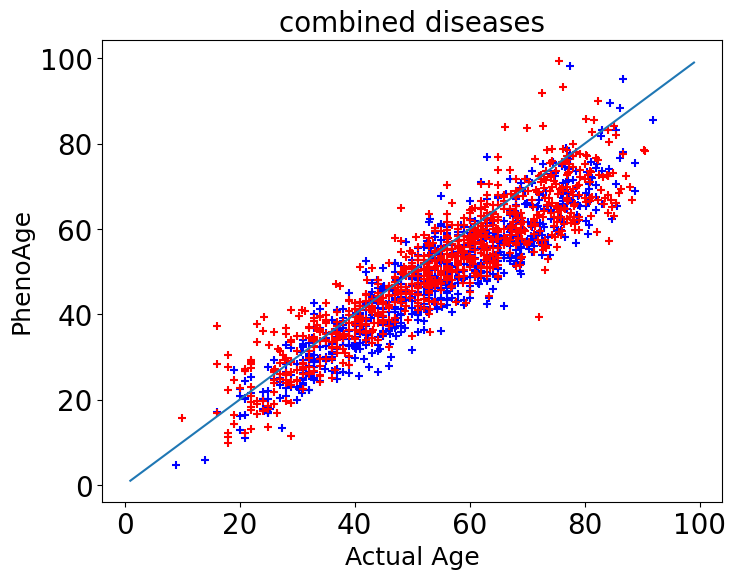

In [89]:
actual_age_d = downd_pheno_pred['Age'].to_list() + ibsd_pheno_pred['Age'].to_list() + arth_pheno_pred['Age'].to_list() + msd_pheno_pred['Age'].to_list() + parkd_pheno_pred['Age'].to_list() + WSd_pheno_pred['Age'].to_list()
actual_age_h = downn_pheno_pred['Age'].to_list() + ibsn_pheno_pred['Age'].to_list() + anor_pheno_pred['Age'].to_list() + msn_pheno_pred['Age'].to_list() + parkn_pheno_pred['Age'].to_list() + WSh_pheno_pred['Age'].to_list()
pred_age_h = downn_pheno_pred['pred_pheno_w_weight'].to_list() + ibsn_pheno_pred['pred_pheno_w_weight'].to_list() + anor_pheno_pred['pred_pheno_w_weight'].to_list() + msn_pheno_pred['pred_pheno_w_weight'].to_list() + parkn_pheno_pred['pred_pheno_w_weight'].to_list() + WSh_pheno_pred['pred_pheno_w_weight'].to_list()
pred_age_d = downd_pheno_pred['pred_pheno_w_weight'].to_list() + ibsd_pheno_pred['pred_pheno_w_weight'].to_list() + arth_pheno_pred['pred_pheno_w_weight'].to_list() + msd_pheno_pred['pred_pheno_w_weight'].to_list() + parkd_pheno_pred['pred_pheno_w_weight'].to_list() + WSd_pheno_pred['pred_pheno_w_weight'].to_list()
#combined
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Actual Age',fontsize=18)
plt.ylabel('PhenoAge',fontsize=18)
plt.title('combined diseases', fontsize=20)
x = np.arange(1,100)
plt.plot(x, x)
plt.scatter(actual_age_h,pred_age_h,marker='+', color='b')
plt.scatter(actual_age_d,pred_age_d,marker='+', color='r')

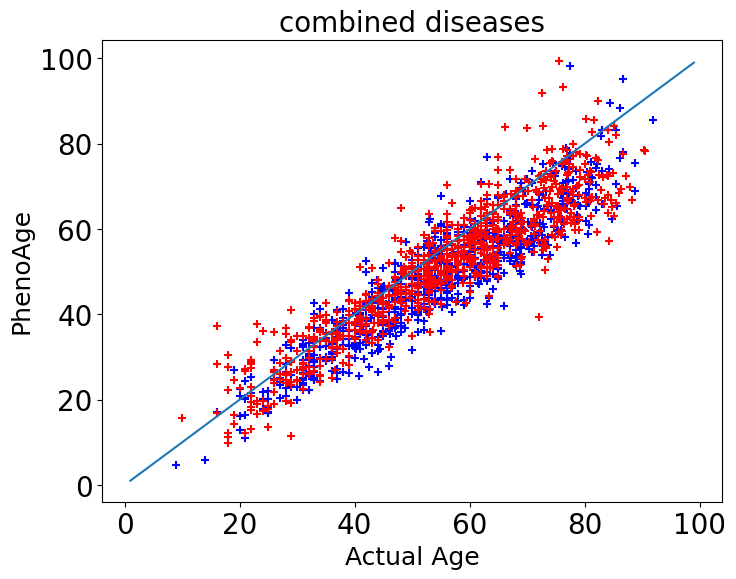

In [88]:
actual_age_d = downd_pheno_pred['Age'].to_list() +  arth_pheno_pred['Age'].to_list() + msd_pheno_pred['Age'].to_list() + parkd_pheno_pred['Age'].to_list() + WSd_pheno_pred['Age'].to_list()
actual_age_h = downn_pheno_pred['Age'].to_list() +  anor_pheno_pred['Age'].to_list() + msn_pheno_pred['Age'].to_list() + parkn_pheno_pred['Age'].to_list() + WSh_pheno_pred['Age'].to_list()
pred_age_h = downn_pheno_pred['pred_pheno_w_weight'].to_list() + anor_pheno_pred['pred_pheno_w_weight'].to_list() + msn_pheno_pred['pred_pheno_w_weight'].to_list() + parkn_pheno_pred['pred_pheno_w_weight'].to_list() + WSh_pheno_pred['pred_pheno_w_weight'].to_list()
pred_age_d = downd_pheno_pred['pred_pheno_w_weight'].to_list() + arth_pheno_pred['pred_pheno_w_weight'].to_list() + msd_pheno_pred['pred_pheno_w_weight'].to_list() + parkd_pheno_pred['pred_pheno_w_weight'].to_list() + WSd_pheno_pred['pred_pheno_w_weight'].to_list()
#combined
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Actual Age',fontsize=18)
plt.ylabel('PhenoAge',fontsize=18)
plt.title('combined diseases', fontsize=20)
x = np.arange(1,100)
plt.plot(x, x)
plt.scatter(actual_age_h,pred_age_h,marker='+', color='b')
plt.scatter(actual_age_d,pred_age_d,marker='+', color='r')

In [28]:
h_subtracted = list()
for i, j in zip(actual_age_h,pred_age_h):
    h_subtracted.append(j-i)
d_subtracted = list()
for i, j in zip(actual_age_d,pred_age_d):
    d_subtracted.append(j-i)

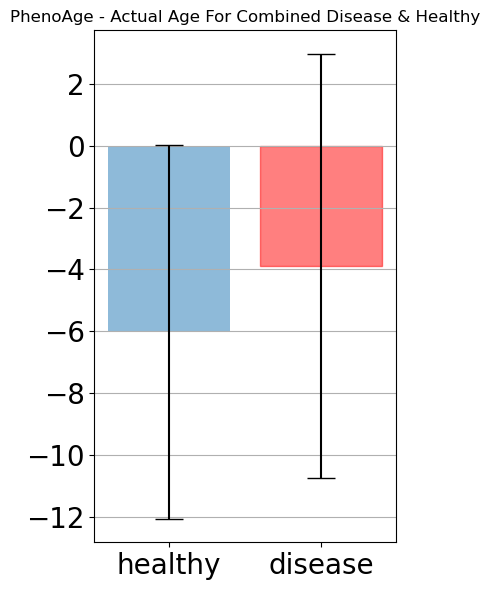

In [24]:
# Calculate the mean for combined healthy and combined disease
h_mean = np.mean([x for x in h_subtracted if str(x) != 'nan'])
a_mean = np.mean([x for x in d_subtracted if str(x) != 'nan'])

# Calculate the standard deviation
h_std = np.std([x for x in h_subtracted if str(x) != 'nan'])
a_std = np.std([x for x in d_subtracted if str(x) != 'nan'])

# Define labels, positions, bar heights and error bar heights
labels = ['healthy', 'disease']
x_pos = np.arange(len(labels))
CTEs = [h_mean, a_mean]
error = [h_std, a_std]

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(4)
barlist = ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
barlist[1].set_color('r')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('PhenoAge - Actual Age For Combined Disease & Healthy')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [32]:
h_subtracted_abs = list()
for i, j in zip(actual_age_h,pred_age_h):
    h_subtracted_abs.append(abs(j-i))
d_subtracted_abs = list()
for i, j in zip(actual_age_d,pred_age_d):
    d_subtracted_abs.append(abs(j-i))

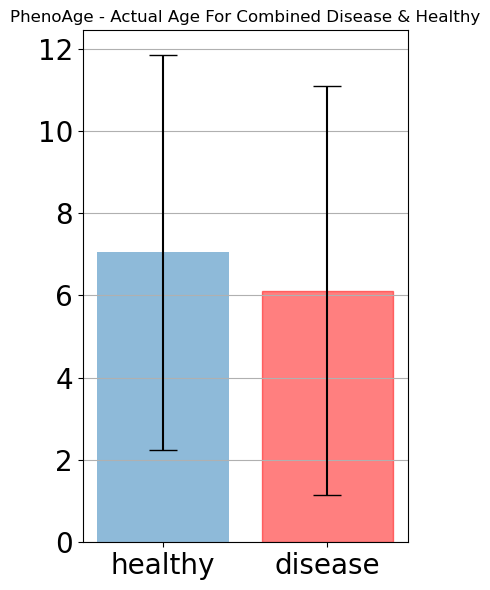

In [34]:
h_mean_abs = np.mean([x for x in h_subtracted_abs if str(x) != 'nan'])
a_mean_abs = np.mean([x for x in d_subtracted_abs if str(x) != 'nan'])

h_std_abs = np.std([x for x in h_subtracted_abs if str(x) != 'nan'])
a_std_abs = np.std([x for x in d_subtracted_abs if str(x) != 'nan'])

labels = ['healthy', 'disease']
x_pos = np.arange(len(labels))
CTEs = [h_mean_abs, a_mean_abs]
error = [h_std_abs, a_std_abs]

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(4)
barlist = ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
barlist[1].set_color('r')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('PhenoAge - Actual Age For Combined Disease & Healthy')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [40]:
from statsmodels.stats.weightstats import ttest_ind
stats.ttest_ind([i for i in h_subtracted_abs if str(i) != 'nan'],[j for j in d_subtracted_abs if str(j) != 'nan'], alternative='two-sided')


Ttest_indResult(statistic=3.8135877186928364, pvalue=0.00014212306821188397)

In [56]:
# mean of difference for each dataset
-(anor_pheno_pred['Age'] - anor_pheno_pred['pred_pheno_w_weight']).mean() # = -4.898827023936751
-(WSh_pheno_pred['Age'] - WSh_pheno_pred['pred_pheno_w_weight']).mean() # = -13.525977714587668
-(ibsn_pheno_pred['Age'] - ibsn_pheno_pred['pred_pheno_w_weight']).mean() # = -4.185912025219407
-(msn_pheno_pred['Age'] - msn_pheno_pred['pred_pheno_w_weight']).mean() # = -5.200979004807979
-(downn_pheno_pred['Age'] - downn_pheno_pred['pred_pheno_w_weight']).mean() # = -5.335216080243104
-(parkn_pheno_pred['Age'] - parkn_pheno_pred['pred_pheno_w_weight']).mean() # = -8.49136727269704

-(arth_pheno_pred['Age'] - arth_pheno_pred['pred_pheno_w_weight']).mean() # = -1.9463216120596543
-(WSd_pheno_pred['Age'] - WSd_pheno_pred['pred_pheno_w_weight']).mean() # = -6.520163018964955
-(ibsd_pheno_pred['Age'] - ibsd_pheno_pred['pred_pheno_w_weight']).mean() # = 2.180426718505584
-(msd_pheno_pred['Age'] - msd_pheno_pred['pred_pheno_w_weight']).mean() # = -4.38809503992576
-(downd_pheno_pred['Age'] - downd_pheno_pred['pred_pheno_w_weight']).mean() # = 5.621852322938691
-(parkd_pheno_pred['Age'] - parkd_pheno_pred['pred_pheno_w_weight']).mean() # = -7.477935163773284



-7.477935163773284

In [57]:
from statsmodels.stats.weightstats import ttest_ind
stats.ttest_ind((-4.898827023936751, -13.525977714587668, -4.185912025219407,
                -5.200979004807979, -5.335216080243104, -8.49136727269704),
                (-1.9463216120596543, -6.520163018964955, 2.180426718505584, -4.38809503992576,
                5.621852322938691, -7.477935163773284
                ), alternative='two-sided')
                 

Ttest_indResult(statistic=-1.9038287742065854, pvalue=0.08607712155736857)

In [72]:
(abs(anor_pheno_pred['pred_pheno_w_weight']- anor_pheno_pred['Age'])).mean() # = 6.3639738067640925
(abs(WSh_pheno_pred['pred_pheno_w_weight']- WSh_pheno_pred['Age'])).mean() # = 13.525977714587668
(abs(ibsn_pheno_pred['pred_pheno_w_weight']- ibsn_pheno_pred['Age'])).mean() # = 5.069601470426138
(abs(msn_pheno_pred['pred_pheno_w_weight']- msn_pheno_pred['Age'])).mean() # = 5.973433864178561
(abs(downn_pheno_pred['pred_pheno_w_weight']- downn_pheno_pred['Age'])).mean() # = 5.979472464437191
(abs(parkn_pheno_pred['pred_pheno_w_weight']- parkn_pheno_pred['Age'])).mean() # = 9.146419745703577

(abs(arth_pheno_pred['pred_pheno_w_weight']- arth_pheno_pred['Age'])).mean() # = 4.326624079784223
(abs(WSd_pheno_pred['pred_pheno_w_weight']- WSd_pheno_pred['Age'])).mean() # = 6.520163018964955
(abs(ibsd_pheno_pred['pred_pheno_w_weight']- ibsd_pheno_pred['Age'])).mean() # = 5.168274708520073
(abs(msd_pheno_pred['pred_pheno_w_weight']- msd_pheno_pred['Age'])).mean() # = 5.00227378707031
(abs(downd_pheno_pred['pred_pheno_w_weight']- downd_pheno_pred['Age'])).mean() # = 6.502578849218007
(abs(parkd_pheno_pred['pred_pheno_w_weight']- parkd_pheno_pred['Age'])).mean() # = 8.907432934572443


8.907432934572443

In [73]:
from statsmodels.stats.weightstats import ttest_ind
stats.ttest_ind((6.3639738067640925, 13.525977714587668, 5.069601470426138,
                5.973433864178561, 5.979472464437191, 9.146419745703577),
                (4.326624079784223, 6.520163018964955, 5.168274708520073, 
                 5.00227378707031, 6.502578849218007, 8.907432934572443
                ), alternative='two-sided')

Ttest_indResult(statistic=1.0981056195554264, pvalue=0.29789419559916075)